# Intro to Deep Learning
#### Jordan DeKraker & Haider Al-Tahan

This is the practical component of this tutorial will focus on hands-on experience with Tensorflow. Topics will include:

1.   Introduction to Tensorflow 2.0 and Keras. 
2.   Train and evaluate  of dense and convolutional neural networks for real problems.
3.   An open session for exploring and adapting existing NNs or for helping attendees build their own networks.

You can use [Google Colaboratory]('http://colab.research.google.com') notebook file which is a [Jupyter notebook]('https://jupyter.org/') with free limited access to a GPU. Jupyter notebooks allows python programs to run directly in the browser which can be great way to learn and use TensorFlow.

If you are using Google colab notebook and want to utilize the free GPU for training, do the following:

1. At the top-left of the of the menu bar, Select `Runtime` > `Change runtime type`. 
2. Click on `Hardware accelerator` > `GPU`.
3. At the top-right of the menu bar, select `CONNECT` to initialize your python interpreter.


# TensorFlow Installation
Note: you can also use this notebook locally on your machine. Just make sure that you have TensorFlow 2.0.
When installing TensorFlow on your local machine, you also need to make sure that you have the right CPU or GPU version depending your machine.
* If you have a GPU with CUDA and Cudnn or using google colab installed then you just do `pip install tensorflow-gpu==2.0.0` in your terminal.
* If you don't have CUDA and Cudnn installed but have a GPU then follow [these instructions]('https://www.tensorflow.org/install/gpu').
* Otherwise you can use your CPU and install TensorFlow by running `pip install tensorflow==2.0.0` in your terminal.

In [1]:
# Without GPU
# !pip install tensorflow==2.0.0
# With GPU 
# !pip install tensorflow-gpu==2.0.0
# !pip install matplotlib
# If using colab
%tensorflow_version 2.x

TensorFlow 2.x selected.


# Imports

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib.lines import Line2D
print(tf.__version__)
%matplotlib inline

2.0.0


# Dataset
For the first example we will use varous dataset. Keras provide us with basic image datasets that we could load with ease. Here is few that we are going to test:

1.   MNIST -> this dataset consist of 60,000 (28x28) grayscale images for training and 10,000 images for testing. There are two variations of this dataset MNIST contain images in 10 classes of hand written digits. The other version of MNIST is called Fashion MNIST that consist of  60,000 (28x28) grayscale images of 10 fashion categories.

2.   CIFAR -> this dataset consist of 50,000 (32x32) color images for training and 10,000 images for testing. There are two variations of this dataset CIFAR10 contain images in 10 classes (6000 images per class). While, the CIFAR100 contain images in 100 classes (600 images per class).


In [0]:
from keras.datasets import cifar10, mnist, cifar100, fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5)

# Visualize Dataset

The images are NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to N. Each integer correspond to different image class.

For our data variable (`x_train`), if we print the shape of our training data variable we will get a shape that corresponds to (number of samples, width of images, height of images, number of channels). In this case, 3 dimensional channel it means that we are dealing with colored images. 

For our labels variable (`y_train`), we same number of labels as our `x_train` data. Hence, if we print out the shape we get a matrix of shape: (number of samples, features).


In [35]:
number_of_classes = y_train.max() - y_train.min() + 1
print(f"Training Matrix Shape for data: {x_train.shape}")
print(f"Training Matrix Shape for labels: {y_train.shape}")
print(f"Number of Classes: {number_of_classes}")
print(f"Validation Matrix Shape for data: {x_val.shape}")
print(f"Validation Matrix Shape for labels: {y_val.shape}")
print(f"Testing Matrix Shape for data: {x_test.shape}")
print(f"Testing Matrix Shape for labels: {y_test.shape}")

Training Matrix Shape for data: (60000, 28, 28)
Training Matrix Shape for labels: (60000,)
Number of Classes: 10
Validation Matrix Shape for data: (5000, 28, 28)
Validation Matrix Shape for labels: (5000,)
Testing Matrix Shape for data: (5000, 28, 28)
Testing Matrix Shape for labels: (5000,)


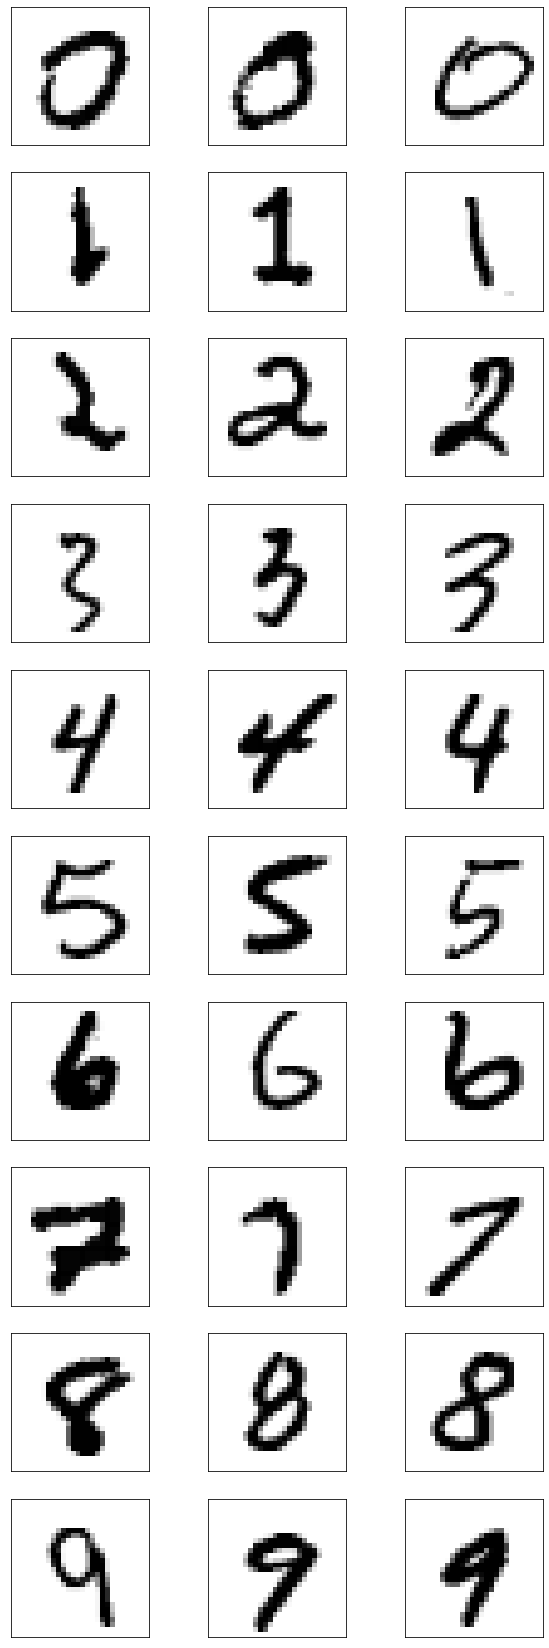

In [36]:
number_of_samples = 3
plt.figure(figsize=(number_of_classes,number_of_samples*10))
image_shape = x_train.shape[1:]

c = 1
for i in range(number_of_classes):
    random_samples =  np.random.choice(np.argwhere(y_train == i)[:,0], number_of_samples)
    for j in range(number_of_samples):
        plt.subplot(number_of_classes,number_of_samples,c)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x_train[random_samples[j]], cmap=plt.cm.binary)
        c += 1
plt.show()

# Model Construction

We often represent neural networks as a set of layers. Each layer has its own number of units, activation function, etc... For this example, we construct a very basic model consisting of only fully connected layers.

A fully connected layer (called dense layer in Keras) require a one-dimentional input. Hence, the first layer of our network only transforms the 2d image to a one-dimensional and has not learning parameters. Resulting in an array of $height \times width \times channels = Array Size$.

We have chosen 256 nodes (or units) for our first hidden fully connected layer. Increasing the number of nodes, increases complixity and computation time. Sometime it is more advantagous to increase complixity by increasing the number of layers rather than the number of nodes.

The last layer consist of 10-nodes that return an array of 10 probability scores that sums to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

![alt text](https://svgshare.com/i/Ftm.svg)

In [37]:
model = Sequential()
model.add(keras.layers.Flatten(input_shape=image_shape))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(number_of_classes, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


# Compile the Model

Before training we need to compile our model. When compiling our model we also need to specify few parameters:

1.   Optimizer: Optimizers update the weight parameters to minimize the loss function. More optimizers can be found [here]('https://keras.io/optimizers/').

2.   Loss Function: acts as guides to the terrain telling optimizer if it is moving in the right direction. The less our loss is the less difference there is between the predicted output and the actual output. More Loss Functions can be found [here]('https://keras.io/losses/').

3.   Metrics: Used to monitor the training and testing steps. More Loss Functions can be found [here]('https://keras.io/metrics/').

In [0]:
# adam_op = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the Model

In [39]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Train on 60000 samples, validate on 5000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 109us/sample - loss: 2.3660 - accuracy: 0.8938 - val_loss: 0.4397 - val_accuracy: 0.8934
Epoch 2/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.3335 - accuracy: 0.9307 - val_loss: 0.2801 - val_accuracy: 0.9342
Epoch 3/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.2550 - accuracy: 0.9404 - val_loss: 0.3144 - val_accuracy: 0.9238
Epoch 4/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.2391 - accuracy: 0.9449 - val_loss: 0.2956 - val_accuracy: 0.9386
Epoch 5/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2204 - accuracy: 0.9485 - val_loss: 0.2878 - val_accuracy: 0.9426
Epoch 6/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2191 - accuracy: 0.9507 - val_loss: 0.3095 - val_accuracy: 0.9464
Epoch 7/10
60000/60000 [===========================

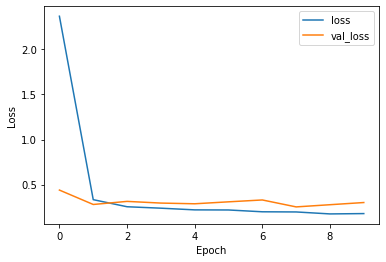

In [40]:
ax = sns.lineplot(range(len(model.history.history['loss'])), model.history.history['loss'])
ax = sns.lineplot(range(len(model.history.history['val_loss'])), model.history.history['val_loss'])
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend(['loss', 'val_loss'])

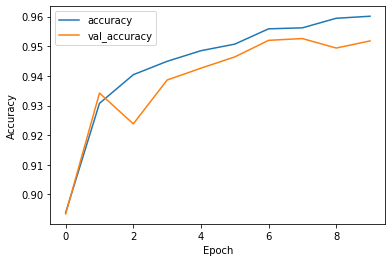

In [41]:
ax = sns.lineplot(range(len(model.history.history['accuracy'])), model.history.history['accuracy'])
ax = sns.lineplot(range(len(model.history.history['val_accuracy'])), model.history.history['val_accuracy'])
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(['accuracy', 'val_accuracy'])

# Quantitative Accuracy

In [0]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 2.3035 - accuracy: 0.1000

Test accuracy: 0.1


# Qualitative Analysis

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ".format('Highest Probability', 100*np.max(predictions_array)), color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label[0]].set_color('blue')
  cmap = plt.cm.coolwarm
  custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                Line2D([0], [0], color=cmap(.5), lw=4),
                Line2D([0], [0], color=cmap(1.), lw=4)]
  plt.legend(custom_lines, ['True Label', 'Other Labels', 'Predicted Label'])

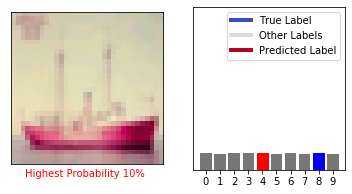

In [0]:
predictions = model.predict(x_test)
i = np.random.randint(0, y_test.shape[0])
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

# Convolution Neural Networks


In [42]:
from keras.datasets import cifar10, mnist, cifar100, fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5)

number_of_classes = y_train.max() - y_train.min() + 1
model = Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(number_of_classes, activation='softmax'))
model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

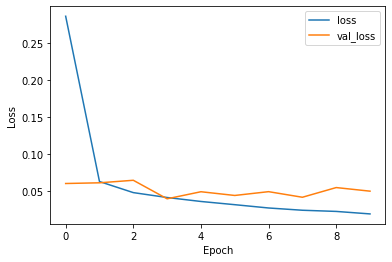

In [43]:
ax = sns.lineplot(range(len(model.history.history['loss'])), model.history.history['loss'])
ax = sns.lineplot(range(len(model.history.history['val_loss'])), model.history.history['val_loss'])
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend(['loss', 'val_loss'])

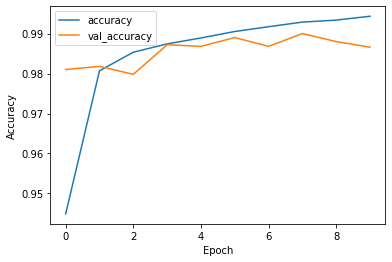

In [44]:
ax = sns.lineplot(range(len(model.history.history['accuracy'])), model.history.history['accuracy'])
ax = sns.lineplot(range(len(model.history.history['val_accuracy'])), model.history.history['val_accuracy'])
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(['accuracy', 'val_accuracy'])

In [45]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

5000/1 - 1s - loss: 0.0393 - accuracy: 0.9854

Test accuracy: 0.9854
